1. Предварительная обработка данных.
Загрузите данные и проведите их первичный анализ. Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.
Разделите данные на тренировочный и тестовый наборы.



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.datasets import load_iris

In [48]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data 
target = iris.target 
names = iris.target_names
df = pd.DataFrame(X, columns=["sepal_lenght", "sepal_width", "petal_lenght", "petal_width"])
df['target'] = iris.target
# df['target'] = df['target'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])
df.head(3)

,sepal_lenght,sepal_width,petal_lenght,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_lenght  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_lenght  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [50]:
df.columns

Index(['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width', 'target'], dtype='object')

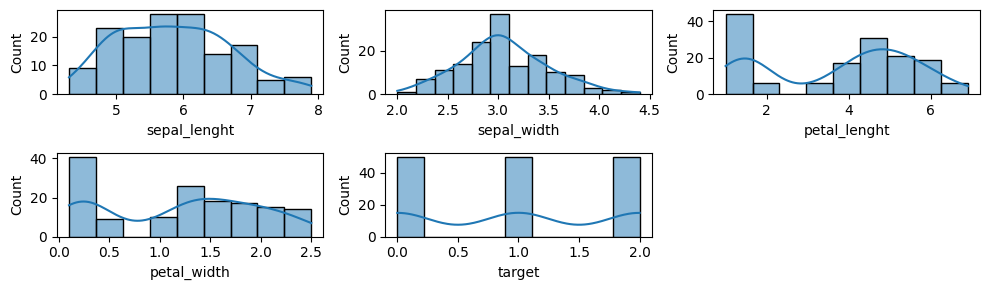

In [57]:
# Визуализация гистограмм
plt.figure(figsize=(10, 3))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)

plt.tight_layout()
plt.show()

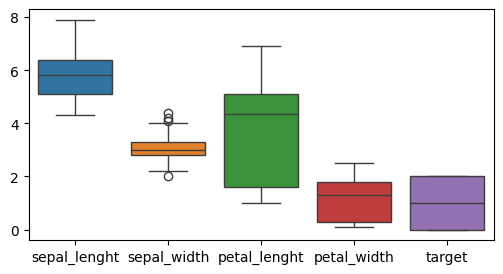

In [55]:
fig, ax = plt.subplots(figsize=(6,3))
sns.boxplot(data= df, ax=ax)
plt.show()

### выбросов нет
### есть дисбаланс в petal

In [53]:
X = df.drop('target', axis=1)
Y = df['target']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)

2. Обучение модели.
— Обучите модель логистической регрессии без регуляризации. Оцените её качество на тренировочных и тестовых данных.
— Повторите шаг с добавлением L1- и L2-регуляризации. Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.



3. Анализ результатов.
— Сравните качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией). Как влияют L1 и L2 на качество модели по сравнению с базовой моделью?
— Постройте графики кривых обучения для каждой из моделей. Что вы можете сказать о способности ваших моделей к обобщению?



4. Отчёт.
— Подготовьте краткий отчёт, в котором обоснуйте свой выбор параметров для моделей с регуляризацией, объясните полученные результаты и сделайте выводы о качестве моделирования.